# Lesson 10 - Fetching Data - Files

# URL Library `urllib`

- Uniform Resource Locator (an 'address' for the thing you wan on The Internet) 
- Library (Other's code we can use)

[`https://docs.python.org/3/library/urllib.html`](https://docs.python.org/3/library/urllib.html)

- We've been indirectly using `urllib` everytime we loaded data into pandas by reading from a url.
- Here's a snapshot of the pandas making use of `urllib`

![pandas_uses_urllib.png](./img/pandas_uses_urllib.png)

[`https://github.com/pandas-dev/pandas/blob/a8968bfa696d51f73769c54f2630a9530488236a/pandas/io/common.py#L232`](https://github.com/pandas-dev/pandas/blob/a8968bfa696d51f73769c54f2630a9530488236a/pandas/io/common.py#L232)

## Get a file by URL Manually
- go here: https://www2.census.gov/geo/tiger/TIGER2021/TRACT/
- click on `06` or 
- put this address in your browser: https://www2.census.gov/geo/tiger/TIGER2021/TRACT/tl_2021_06_tract.zip
- you'll end up with a zip file
- I put mine into a folder named ./data/tiger_manual/

In [3]:
import os

os.listdir('./data/tiger_manual/')

['tl_2021_06_tract.zip']

## Manually Unzip 
- I put mine into a folder named ./data/tiger_manual_unzipped/

In [5]:
os.listdir('./data/tiger_manual/unzipped/')

['tl_2021_06_tract.prj',
 'tl_2021_06_tract.shp.ea.iso.xml',
 'tl_2021_06_tract.dbf',
 'tl_2021_06_tract.shx',
 'tl_2021_06_tract.cpg',
 'tl_2021_06_tract.shp',
 'tl_2021_06_tract.shp.iso.xml']

- You can now read those in using geopandas.

In [6]:
import geopandas as gpd
manual_gdf = gpd.read_file('./data/tiger_manual/unzipped/')

So What is it?

In [8]:
manual_gdf.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,085,504321,06085504321,5043.21,Census Tract 5043.21,G5020,S,1450237,0,+37.3931319,-121.8651427,"POLYGON ((-121.87556 37.39924, -121.87535 37.3..."
1,06,085,504410,06085504410,5044.10,Census Tract 5044.10,G5020,S,1102136,0,+37.4093719,-121.8788884,"POLYGON ((-121.88886 37.40758, -121.88576 37.4..."
2,06,085,507003,06085507003,5070.03,Census Tract 5070.03,G5020,S,9529865,0,+37.2199936,-121.9979512,"POLYGON ((-122.02489 37.21683, -122.02459 37.2..."
3,06,085,507004,06085507004,5070.04,Census Tract 5070.04,G5020,S,2424447,0,+37.2260144,-121.9763816,"POLYGON ((-121.99304 37.22562, -121.99249 37.2..."
4,06,085,502204,06085502204,5022.04,Census Tract 5022.04,G5020,S,331145,0,+37.3013832,-121.9258424,"POLYGON ((-121.93167 37.29803, -121.92801 37.3..."


<AxesSubplot:>

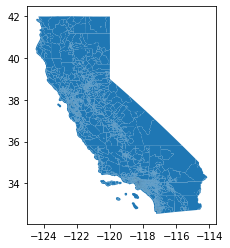

In [11]:
manual_gdf.plot()

**Every Census Tract for all of California!  No wonder it took a bit of time to download!**

### [How to: Fetch Internet Resources Using The urllib Package](https://docs.python.org/3/howto/urllib2.html)

In [15]:
file_url = 'https://www2.census.gov/geo/tiger/TIGER2021/TRACT/tl_2021_06_tract.zip'

In [16]:
import urllib 

In [20]:
os.mkdir('./data/tiger_via_python/')

## `urllib.request.urlretrieve`
> Copy a network object denoted by a URL to a local file. 

[`https://docs.python.org/3/library/urllib.request.html#urllib.request.urlretrieve`](https://docs.python.org/3/library/urllib.request.html#urllib.request.urlretrieve)

In [21]:
urllib.request.urlretrieve(file_url, 'data/tiger_via_python/tl_2021_06_tract.zip')

('data/tiger_via_python/tl_2021_06_tract.zip',
 <http.client.HTTPMessage at 0x7fe8276613f0>)

# Topologically Integrated Geographic Encoding and Referencing = TIGER

![US-Census-TIGERLogo.png](./img/US-Census-TIGERLogo.png)

- Sometimes called TIGER/Line files ("Line' files makes sense as a name,  that's what they are, a bunch of lines.  But also, tigers have lines; so, I guess that's easy to remember)
- Go here: https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html
- Follow hte FTP Archive Link at the bottom under `Download`

https://en.wikipedia.org/wiki/Topologically_Integrated_Geographic_Encoding_and_Referencing

The endpoints are unique based on the GEOID for the State. 

Example URL:
`https://www2.census.gov/geo/tiger/TIGER2021/TRACT/tl_2021_01_tract.zip`

California is GEOID 06. See a list of all the State FIPS codes [https://en.wikipedia.org/wiki/Federal_Information_Processing_Standard_state_code](https://en.wikipedia.org/wiki/Federal_Information_Processing_Standard_state_code). 

![us-PyPI.png](./img/us-PyPI.png)

In [ ]:
#  conda install -c conda-forge us  

In [22]:
import us

In [29]:
us.states.CA.capital

'Sacramento'

In [31]:
us.states.CA.time_zones

['America/Los_Angeles']

In [33]:
us.states.CA.shapefile_urls()

{'tract': 'https://www2.census.gov/geo/tiger/TIGER2010/TRACT/2010/tl_2010_06_tract10.zip',
 'cd': 'https://www2.census.gov/geo/tiger/TIGER2010/CD/111/tl_2010_06_cd111.zip',
 'county': 'https://www2.census.gov/geo/tiger/TIGER2010/COUNTY/2010/tl_2010_06_county10.zip',
 'state': 'https://www2.census.gov/geo/tiger/TIGER2010/STATE/2010/tl_2010_06_state10.zip',
 'zcta': 'https://www2.census.gov/geo/tiger/TIGER2010/ZCTA5/2010/tl_2010_06_zcta510.zip',
 'block': 'https://www2.census.gov/geo/tiger/TIGER2010/TABBLOCK/2010/tl_2010_06_tabblock10.zip',
 'blockgroup': 'https://www2.census.gov/geo/tiger/TIGER2010/BG/2010/tl_2010_06_bg10.zip'}

In [38]:
us.states

<module 'us.states' from '/home/javier/miniconda3/envs/gis/lib/python3.10/site-packages/us/states.py'>

In [34]:
us.states.CA.fips

'06'

- Maybe a bit out of date, but still quite useful!

#### Say you wanted to get the states of California, Texas, and New York 

`['06', '48', '36']`

In [39]:
print(us.states.CA.fips)
print(us.states.TX.fips)
print(us.states.NY.fips)

06
48
36


Or you could always just look these up online

In [40]:
list_ca_tx_ny_fips = ['06', '48', '36']

#### Create a loop 

In [41]:
for fips in list_ca_tx_ny_fips:
    print(fips)
    file_url = f'https://www2.census.gov/geo/tiger/TIGER2021/TRACT/tl_2021_{fips}_tract.zip'
    urllib.request.urlretrieve(file_url, f'data/tl_2021_{fips}_tract.zip')  

06
48
36


In [42]:
import zipfile

In [22]:
z = zipfile.ZipFile('data/tl_2021_06_tract.zip')

z

<zipfile.ZipFile filename='data/tl_2021_06_tract.zip' mode='r'>

## `zipfile.ZipFile` 
> Open a ZIP file, where file can be a path to a file (a string), a file-like object or a path-like object.

[`https://docs.python.org/3/library/zipfile.html#zipfile-objects`](https://docs.python.org/3/library/zipfile.html#zipfile-objects)

In [43]:
z = zipfile.ZipFile('./data/tl_2021_36_tract.zip')

## `ZipFile.extractall`
> Extract all members from the archive to the current working directory.

[`https://docs.python.org/3/library/zipfile.html#zipfile.ZipFile.extractall`](https://docs.python.org/3/library/zipfile.html#zipfile.ZipFile.extractall)

In [44]:
z.extractall('data/test_extract/')

In [45]:
os.listdir('data/test_extract/')

['tl_2021_36_tract.dbf',
 'tl_2021_36_tract.prj',
 'tl_2021_36_tract.shx',
 'tl_2021_36_tract.shp.ea.iso.xml',
 'tl_2021_36_tract.cpg',
 'tl_2021_36_tract.shp',
 'tl_2021_36_tract.shp.iso.xml']

## Combine Shapefiles

#### Now let's loop through our Big State Shapefiles

In [47]:
for fips in list_ca_tx_ny_fips:
    z = zipfile.ZipFile(f'data/tl_2021_{fips}_tract.zip')
    z.extractall('data/big_state_tracts')

## `Lib/glob.py`
> The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell, although results are returned in arbitrary order.

[`https://docs.python.org/3/library/glob.html`](https://docs.python.org/3/library/glob.html)

In [49]:
import glob

In [27]:
glob.glob('data/big_state_tracts/*')

['data/big_state_tracts/tl_2021_48_tract.prj',
 'data/big_state_tracts/tl_2021_36_tract.dbf',
 'data/big_state_tracts/tl_2021_36_tract.prj',
 'data/big_state_tracts/tl_2021_06_tract.prj',
 'data/big_state_tracts/tl_2021_06_tract.shp.ea.iso.xml',
 'data/big_state_tracts/tl_2021_36_tract.shx',
 'data/big_state_tracts/tl_2021_06_tract.dbf',
 'data/big_state_tracts/tl_2021_06_tract.shx',
 'data/big_state_tracts/tl_2021_36_tract.shp.ea.iso.xml',
 'data/big_state_tracts/tl_2021_48_tract.shx',
 'data/big_state_tracts/tl_2021_06_tract.cpg',
 'data/big_state_tracts/tl_2021_48_tract.cpg',
 'data/big_state_tracts/tl_2021_48_tract.shp',
 'data/big_state_tracts/tl_2021_48_tract.dbf',
 'data/big_state_tracts/tl_2021_36_tract.cpg',
 'data/big_state_tracts/tl_2021_48_tract.shp.iso.xml',
 'data/big_state_tracts/tl_2021_36_tract.shp',
 'data/big_state_tracts/tl_2021_06_tract.shp',
 'data/big_state_tracts/tl_2021_36_tract.shp.iso.xml',
 'data/big_state_tracts/tl_2021_48_tract.shp.ea.iso.xml',
 'data/big_

## `glob.glob`
> Return a possibly-empty list of path names that match pathname, which must be a string containing a path specification. 

[`https://docs.python.org/3/library/glob.html#glob.glob`](https://docs.python.org/3/library/glob.html#glob.glob)

In [51]:
glob.glob('data/big_state_tracts/*.shp')

['data/big_state_tracts/tl_2021_48_tract.shp',
 'data/big_state_tracts/tl_2021_36_tract.shp',
 'data/big_state_tracts/tl_2021_06_tract.shp']

## `pandas.concat`
> Concatenate pandas objects along a particular axis with optional set logic along the other axes.

[`https://pandas.pydata.org/docs/reference/api/pandas.concat.html#pandas-concat`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html#pandas-concat)

In [53]:
list_gdf_from_shape_files = []

for shp in glob.glob('data/big_state_tracts/*.shp'):
    gdf = gpd.read_file(shp)
    
    list_gdf_from_shape_files.append(gdf)

In [55]:
import pandas as pd
big_state_tracts_gdf = pd.concat(list_gdf_from_shape_files)

_other ways to combine in `pandas`_
[`https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html`](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

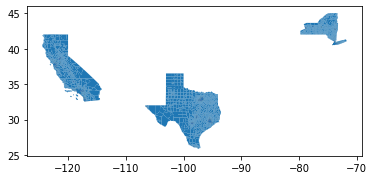

In [56]:
big_state_tracts_gdf.plot();

In [74]:
#!pip install xlrd

In [79]:
df = pd.read_excel('data/rollingsales_statenisland.xls')

# Dealing with data spread across multiple files.

#### Extract Fees for Services in Santa Monica Over 2014 to 2022

- This is an example of data published on a yearly cadance which we may want stiched together into a single dataframe for analysis.

![samo_fees_and_rates_screenshot.png](./img/samo_fees_and_rates_screenshot.png)

- ### Visit https://data.smgov.net/browse?q=%22Fees%20and%20Rates%22%20Finance&sortBy=alpha

- ### Click through and download `csv`s for each of these years.
![download_fees_as_csv.png](./img/download_fees_as_csv.png)




- ### Collect them into a single folder (I called mine `samo_fees`). 
(On Dolphin in KDE Linux it looks like this)

![downloaded_samo_fees_screenshot](./img/downloaded_samo_fees_screenshot.png)

Open a few of these files and confirm they've all got the same headder

In [59]:
os.listdir('samo_fees/')

['Fees_and_Rates_2017-18.csv',
 'Fees_and_Rates_2018-19.csv',
 'Fees_and_Rates_2019-20.csv',
 'Fees_and_Rates_2015-16.csv',
 'Fees_and_Rates_2016-17.csv',
 'Fees_and_Rates_2021-2022.csv',
 'Fees_and_Rates_2014-15.csv']

## `Lib/pathlib.py` 
> This module offers classes representing filesystem paths with semantics appropriate for different operating systems. Path classes are divided between pure paths, which provide purely computational operations without I/O, and concrete paths, which inherit from pure paths but also provide I/O operations.

[`https://docs.python.org/3/library/pathlib.html`](https://docs.python.org/3/library/pathlib.html)

In [65]:
from pathlib import Path

samo_fees_base_path = Path('./samo_fees')

## `Path.glob()`
> Glob the given relative pattern in the directory represented by this path, yielding all matching files (of any kind):

[`https://docs.python.org/3/library/pathlib.html#pathlib.Path.glob`](https://docs.python.org/3/library/pathlib.html#pathlib.Path.glob)

In [81]:
yearly_fee_rates_list = sorted(samo_fees_base_path.glob('*.csv'))
yearly_fee_rates_list

[PosixPath('samo_fees/Fees_and_Rates_2014-15.csv'),
 PosixPath('samo_fees/Fees_and_Rates_2015-16.csv'),
 PosixPath('samo_fees/Fees_and_Rates_2016-17.csv'),
 PosixPath('samo_fees/Fees_and_Rates_2017-18.csv'),
 PosixPath('samo_fees/Fees_and_Rates_2018-19.csv'),
 PosixPath('samo_fees/Fees_and_Rates_2019-20.csv'),
 PosixPath('samo_fees/Fees_and_Rates_2021-2022.csv')]

In [83]:
years_list = [2014,2015,2016,2017,2018,2019,2020,2021]

In [84]:
list(zip(yearly_fee_rates_list, years_list))

[(PosixPath('samo_fees/Fees_and_Rates_2014-15.csv'), 2014),
 (PosixPath('samo_fees/Fees_and_Rates_2015-16.csv'), 2015),
 (PosixPath('samo_fees/Fees_and_Rates_2016-17.csv'), 2016),
 (PosixPath('samo_fees/Fees_and_Rates_2017-18.csv'), 2017),
 (PosixPath('samo_fees/Fees_and_Rates_2018-19.csv'), 2018),
 (PosixPath('samo_fees/Fees_and_Rates_2019-20.csv'), 2019),
 (PosixPath('samo_fees/Fees_and_Rates_2021-2022.csv'), 2020)]

In [89]:
def combine_years(list_of_files, year_list):
    total_rows = 0
    pdf_list = []
    
    for n, file in enumerate(list_of_files):
        print(year_list[n], file)
        pdf = pd.read_csv(file)
        pdf['year'] = year_list[n]
        num_rows = pdf.shape[0]
        print('    ', num_rows,'\n')
        total_rows += num_rows
        pdf_list.append(pdf)
        
    pdf_all = pd.concat(pdf_list)
    
    print(f'total rows: {total_rows}')
    return pdf_all

In [90]:
fees_all_years_pdf = combine_years(yearly_fee_rates_list, years_list)

2014 samo_fees/Fees_and_Rates_2014-15.csv
     1608 

2015 samo_fees/Fees_and_Rates_2015-16.csv
     1651 

2016 samo_fees/Fees_and_Rates_2016-17.csv
     1695 

2017 samo_fees/Fees_and_Rates_2017-18.csv
     1706 

2018 samo_fees/Fees_and_Rates_2018-19.csv
     1848 

2019 samo_fees/Fees_and_Rates_2019-20.csv
     1858 

2020 samo_fees/Fees_and_Rates_2021-2022.csv
     1782 

total rows: 12148


In [91]:
fees_all_years_pdf.shape

(12148, 22)

In [92]:
fees_all_years_pdf.head()

,Department,Division,Category,Activity,Keywords,Fee Name / Description,Fee,Fee - Other,Unit,Additional Fee,...,Rate Tier,Comments,External Link,Notes,year,Fee Name/Description,Fee - Other,External Link(s),Additional Fee,FEE
0,Community and Cultural Services,Cultural Affairs,Parking,NaN,"Parking, Beach, Beach House, Annenberg Beach H...",Annenberg Community Beach House Parking,12.0,NaN,per day,NaN,...,NaN,"Parking ranges from $8-12, depending on season...",Additional information is available at: \n<a t...,NOTESBHP1 (http://www.smgov.net/Departments/Fi...,2014,NaN,NaN,NaN,NaN,NaN
1,Community and Cultural Services,Cultural Affairs,Parking,NaN,"Parking, Beach, Beach House, Annenberg Beach H...",Annenberg Community Beach House Parking,3.0,NaN,per hour,NaN,...,NaN,"Per Resolution No. 10816 (CCS), this fee is no...",Additional information is available at: \n<a t...,NOTESBHP1 (http://www.smgov.net/Departments/Fi...,2014,NaN,NaN,NaN,NaN,NaN
2,Community and Cultural Services,Cultural Affairs,Aquatics/Swimming,NaN,"pool, swim, swimming, Beach House, beach, Anne...","Annenberg Community Beach House, Pool Day Pass...",10.0,NaN,NaN,NaN,...,NaN,"Per Resolution No. 10816 (CCS), this fee is no...",Additional information is available at: \n<a t...,NOTESBHP1 (http://www.smgov.net/Departments/Fi...,2014,NaN,NaN,NaN,NaN,NaN
3,Community and Cultural Services,Cultural Affairs,Aquatics/Swimming,NaN,"pool, swim, swimming, Beach House, beach, Anne...","Annenberg Community Beach House, Pool Day Pass...",4.0,NaN,NaN,NaN,...,NaN,"Per Resolution No. 10816 (CCS), this fee is no...",Additional information is available at: \n<a t...,NOTESBHP1 (http://www.smgov.net/Departments/Fi...,2014,NaN,NaN,NaN,NaN,NaN
4,Community and Cultural Services,Cultural Affairs,Aquatics/Swimming,NaN,"pool, swim, swimming, Beach House, beach, Anne...","Annenberg Community Beach House, Pool Day Pass...",5.0,NaN,NaN,NaN,...,NaN,"Per Resolution No. 10816 (CCS), this fee is no...",Additional information is available at: \n<a t...,NOTESBHP1 (http://www.smgov.net/Departments/Fi...,2014,NaN,NaN,NaN,NaN,NaN


In [99]:
fees_all_years_pdf[fees_all_years_pdf['year']==2014].head(1)

,Department,Division,Category,Activity,Keywords,Fee Name / Description,Fee,Fee - Other,Unit,Additional Fee,...,Rate Tier,Comments,External Link,Notes,year,Fee Name/Description,Fee - Other,External Link(s),Additional Fee,FEE
0,Community and Cultural Services,Cultural Affairs,Parking,NaN,"Parking, Beach, Beach House, Annenberg Beach H...",Annenberg Community Beach House Parking,12.0,NaN,per day,NaN,...,NaN,"Parking ranges from $8-12, depending on season...",Additional information is available at: \n<a t...,NOTESBHP1 (http://www.smgov.net/Departments/Fi...,2014,NaN,NaN,NaN,NaN,NaN


In [100]:
fees_all_years_pdf[fees_all_years_pdf['year']==2015].head(1)

,Department,Division,Category,Activity,Keywords,Fee Name / Description,Fee,Fee - Other,Unit,Additional Fee,...,Rate Tier,Comments,External Link,Notes,year,Fee Name/Description,Fee - Other,External Link(s),Additional Fee,FEE
0,Planning and Community Development,Code Compliance,Permits,NaN,"Tenant, Protection, Construction",NaN,253.64,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2015,Tenant Protection During Construction,NaN,NaN,NaN,NaN


In [98]:
fees_all_years_pdf[fees_all_years_pdf['year']==2016].head(1)

,Department,Division,Category,Activity,Keywords,Fee Name / Description,Fee,Fee - Other,Unit,Additional Fee,...,Rate Tier,Comments,External Link,Notes,year,Fee Name/Description,Fee - Other,External Link(s),Additional Fee,FEE
0,Community and Cultural Services,Cultural Affairs,Parking,NaN,"Parking, Beach, Beach House, Annenberg Beach H...",NaN,12.0,NaN,per day,NaN,...,NaN,"Parking ranges from $8-12, depending on season...",NaN,"<a href=""http://finance.smgov.net/fees-taxes/b...",2016,Annenberg Community Beach House Parking,NaN,Additional information is available at: \n<a h...,NaN,NaN


In [94]:
fees_all_years_pdf.columns.unique()

Index(['Department', 'Division', 'Category', 'Activity', 'Keywords',
       'Fee Name / Description', 'Fee', 'Fee - Other', 'Unit',
       'Additional Fee ', 'Additional Fee Unit', 'Deposit', 'Rate Tier',
       'Comments', 'External Link', 'Notes', 'year', 'Fee Name/Description',
       'Fee  -  Other', 'External Link(s)', 'Additional Fee', 'FEE'],
      dtype='object')

- Looks like the column named `Fee Name / Description` changed to `Fee Name/Description` after 2014.

Coalesce the columns whose name changed
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.combine_first.html

And drop the old columns
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

In [134]:
name1 = 'Fee Name / Description'
name2 = 'Fee Name/Description'

fees_all_years_pdf['fee_name'] = fees_all_years_pdf[name1].combine_first(fees_all_years_pdf[name2])
fees_all_years_pdf.drop([name1, name2],axis=1).head()

,Department,Division,Category,Activity,Keywords,Fee,Fee - Other,Unit,Additional Fee,Additional Fee Unit,...,Rate Tier,Comments,External Link,Notes,year,Fee - Other,External Link(s),Additional Fee,FEE,fee_name
0,Community and Cultural Services,Cultural Affairs,Parking,NaN,"Parking, Beach, Beach House, Annenberg Beach H...",12.0,NaN,per day,NaN,NaN,...,NaN,"Parking ranges from $8-12, depending on season...",Additional information is available at: \n<a t...,NOTESBHP1 (http://www.smgov.net/Departments/Fi...,2014,NaN,NaN,NaN,NaN,Annenberg Community Beach House Parking
1,Community and Cultural Services,Cultural Affairs,Parking,NaN,"Parking, Beach, Beach House, Annenberg Beach H...",3.0,NaN,per hour,NaN,NaN,...,NaN,"Per Resolution No. 10816 (CCS), this fee is no...",Additional information is available at: \n<a t...,NOTESBHP1 (http://www.smgov.net/Departments/Fi...,2014,NaN,NaN,NaN,NaN,Annenberg Community Beach House Parking
2,Community and Cultural Services,Cultural Affairs,Aquatics/Swimming,NaN,"pool, swim, swimming, Beach House, beach, Anne...",10.0,NaN,NaN,NaN,NaN,...,NaN,"Per Resolution No. 10816 (CCS), this fee is no...",Additional information is available at: \n<a t...,NOTESBHP1 (http://www.smgov.net/Departments/Fi...,2014,NaN,NaN,NaN,NaN,"Annenberg Community Beach House, Pool Day Pass..."
3,Community and Cultural Services,Cultural Affairs,Aquatics/Swimming,NaN,"pool, swim, swimming, Beach House, beach, Anne...",4.0,NaN,NaN,NaN,NaN,...,NaN,"Per Resolution No. 10816 (CCS), this fee is no...",Additional information is available at: \n<a t...,NOTESBHP1 (http://www.smgov.net/Departments/Fi...,2014,NaN,NaN,NaN,NaN,"Annenberg Community Beach House, Pool Day Pass..."
4,Community and Cultural Services,Cultural Affairs,Aquatics/Swimming,NaN,"pool, swim, swimming, Beach House, beach, Anne...",5.0,NaN,NaN,NaN,NaN,...,NaN,"Per Resolution No. 10816 (CCS), this fee is no...",Additional information is available at: \n<a t...,NOTESBHP1 (http://www.smgov.net/Departments/Fi...,2014,NaN,NaN,NaN,NaN,"Annenberg Community Beach House, Pool Day Pass..."


In [101]:
fees_all_years_pdf['Division'].unique()

array(['Cultural Affairs', 'Code Compliance', 'Building and Safety',
       'Cemetery', 'Water', 'Civil Engineering', 'Community Recreation',
       'City Planning/Development Review',
       'Transportation Planning and Engineering',
       'Community and Cultural Services',
       'Transportation Engineering and Management',
       'Resource Recovery & Recycling', 'Street Services', 'Airport',
       'Administration', 'Public Landscape', 'Fire', 'Police',
       'Animal Control Section', 'Records and Election Services',
       'Finance', 'Office of Sustainability and the Environment',
       'Library', 'Human Services', 'Pier Management', 'Big Blue Bus',
       'Strategic and Transportation Planning',
       'Mobility and Traffic Management', 'City TV', 'Parking Operations',
       'Cultural Affairs - Beach House', nan,
       'City Plannning Planning/Development Review', 'City Planning',
       'Mobility', 'City Planning Planning/Development Review'],
      dtype=object)

In [152]:
yearly_swim_pass_fees_pdf = fees_all_years_pdf[fees_all_years_pdf['fee_name'] == 'Community Aquatics\n - Recreational and Fitness\n - Swim Pass\n - Residents - Adult'][['year','Fee']]#.set_index('year')
yearly_swim_pass_fees_pdf

,year,Fee
149,2014,55.0
1183,2015,55.0
150,2016,55.0
172,2017,55.0
168,2018,55.00
165,2019,55.00
1035,2020,NaN


looks like the fees haven't changed :)

If the did, this plot would be much more interesting.  Is there anything which has changed?

In [153]:
yearly_swim_pass_fees_pdf.dtypes

year     int64
Fee     object
dtype: object

In [154]:
yearly_swim_pass_fees_pdf['Fee'] = pd.to_numeric(yearly_swim_pass_fees_pdf['Fee'])

<AxesSubplot:xlabel='year'>

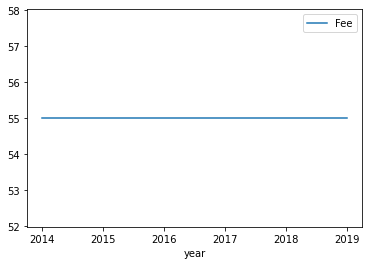

In [155]:
yearly_swim_pass_fees_pdf.plot(x='year',y='Fee')

In [191]:
yearly_parking_fees_pdf = fees_all_years_pdf[fees_all_years_pdf['fee_name'] == 'Community Event Fees,  Beach parking lot, 1550 PCH lot, Small'][['year','Fee']]

In [192]:
yearly_parking_fees_pdf

,year,Fee
1482,2014,2068.0
954,2015,2140.38
1483,2016,2236.7
1490,2017,2314.98
1492,2018,"2,416.84"
1470,2019,2518.34
227,2020,NaN


In [195]:
yearly_parking_fees_pdf['Fee'] = yearly_parking_fees_pdf['Fee'].replace(',','')

In [196]:
yearly_parking_fees_pdf['Fee'] 

1482     2068.0
954     2140.38
1483     2236.7
1490    2314.98
1492    2416.84
1470    2518.34
227         NaN
Name: Fee, dtype: object

In [197]:
yearly_parking_fees_pdf['Fee'] = pd.to_numeric(yearly_parking_fees_pdf['Fee'])

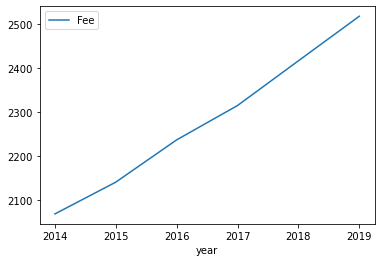

In [199]:
yearly_parking_fees_pdf.plot(x='year', y='Fee');

### OK, so Parking Rates are really going up!
### Let's hope some of those parking fees are going to help make parking safer!

Remember this from the first pandas lesson?

![popular_crimes](./img/popular_crimes.png)